In [ ]:
#Ali Ahmed Hassan Mahmoud 1808627
#Kareem Nader Abdelgawad Helmy 1803641
#Amr fawzy fathy auraby 1803149
#Amir Saleh hobeldin 1801393

In [ ]:

import matplotlib.pylab as plt
import cv2
import numpy as np
from skimage import exposure
from queue import Queue
from PIL import Image
from PIL import ImageDraw

In [ ]:
def show_image(image,title='image',cmap_type='gray') :
  plt.imshow (image,cmap_type)
  plt.title(title)
  #plt.axis("off")

In [ ]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [ ]:
def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 1, blank_image, 1, 0.0)
    return img, blank_image

In [ ]:
image = cv2.imread('test1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]

(720, 1280, 3)


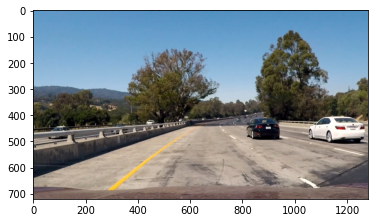

In [ ]:
region_of_interest_vertices = [
    (200, 665),
    (620,410),
    (1130, 665)
  ]
plt.imshow(image)

In [ ]:
#gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
from skimage import color
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
h_channel=hls[:,:,0]
l_channel=hls[:,:,1]
s_channel=hls[:,:,2]
#enhanced=exposure.equalize_hist(gray_image)
#plt.imshow(gray_image,'gray')
canny_image = cv2.Canny(s_channel, 100, 200)
#plt.imshow(canny_image,'gray')
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)


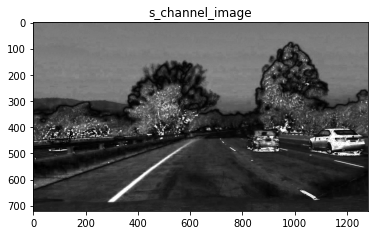

In [ ]:
show_image(s_channel,"s_channel_image")

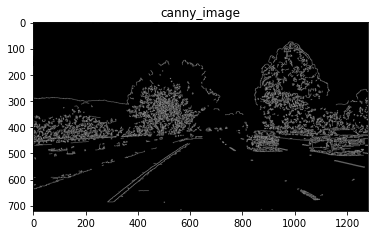

In [ ]:
show_image(canny_image,"canny_image")

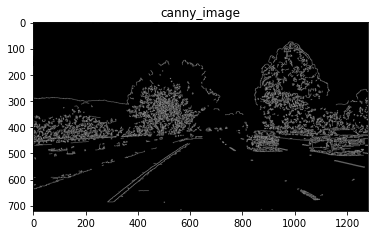

In [ ]:
show_image(canny_image,"canny_image")

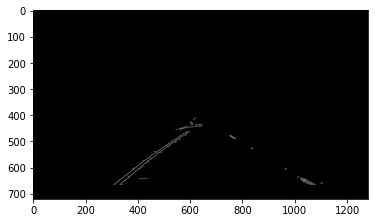

In [ ]:

plt.imshow(cropped_image,'gray')

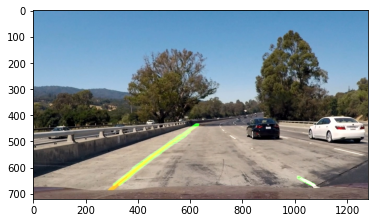

In [ ]:
lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)
image_with_lines , mask = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

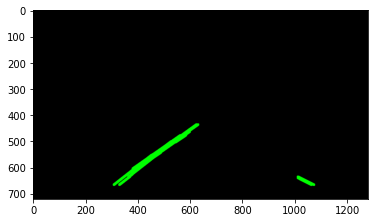

In [ ]:
plt.imshow(mask)
plt.show()

In [ ]:
c = (0,255,0)
indices = np.where(np.all(mask == c, axis=-1))
print(indices)
print(mask.shape)

(array([431, 431, 431, ..., 670, 670, 670]), array([ 624,  626,  630, ...,  330, 1063, 1073]))
(720, 1280, 3)


In [ ]:
x_min=np.min(indices[1])
print(x_min)
x_max=np.max(indices[1])
y_max=np.max(indices[0])
print(y_max)
x_topleft=x_min+280
y_min=np.min(indices[0])
if y_min<450 :
  y_min=450
print(y_min)

304
670
450


In [ ]:

vertices_paint = [
    (x_min,y_max),
    (x_topleft,y_min),
    (x_topleft+45,y_min),
    (x_min+720, y_max)
  ]

In [ ]:

def paint (img,vertices):
  mask = np.zeros_like(img)
  channel_count = img.shape[2]
  cv2.fillPoly(mask, vertices, color=(0, 255, 0))
  return mask

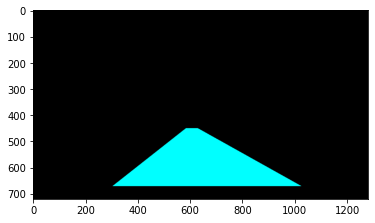

In [ ]:
mask = np.zeros_like(image)
channel_count = image.shape[2]
cv2.fillPoly(mask,  np.array([vertices_paint], np.int32), color=(0, 255, 255))
plt.imshow(mask)

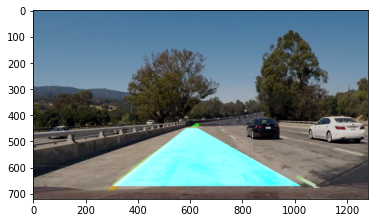

In [ ]:
last_image = cv2.addWeighted(image_with_lines, 0.8, mask, 1, 0.0)
plt.imshow(last_image)

In [ ]:

def get_car_position(x_min,w):
    xm_per_pix=3.7/720
    if x_min is not None:
        car_position = w/2
        lane_center_position = (x_min+(700/2))
        center_dist = (car_position - lane_center_position) * xm_per_pix
    
    return center_dist 

In [ ]:
def get_direction(center_dist):
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    return direction

In [ ]:
print(get_car_position(x_min,1280))
print(x_min)

-0.07194444444444445
304


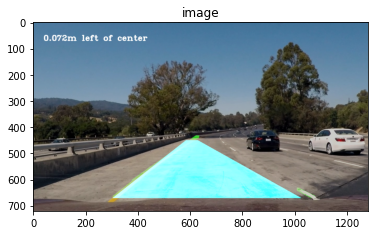

In [ ]:
def write_on_image (img,x_min) :
  font = cv2.FONT_HERSHEY_COMPLEX_SMALL
  text1=get_car_position(x_min,1280)
  direction=get_direction(text1)
  text=abs(get_car_position(x_min,1280))
  text = '{:04.3f}'.format(text) + 'm ' + direction + ' of center'
  edited_photo=cv2.putText(img, text,(40,70), cv2.FONT_HERSHEY_COMPLEX_SMALL,1.5,(255,255,255),2,cv2.LINE_AA)
  return edited_photo;
ex=write_on_image (last_image,x_min)
show_image(ex)



